In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Teoria

Transformacje morfologiczne to grupa operacji bazujących na kształcie obrazu. 

Są one zazwyczaj wykonywane na obrazach binarnych. Wymagają dwóch wejść: jedno jest naszym oryginalnym obrazem, drugie nazywane jest elementem strukturyzującym lub kernelem, które decyduje o charakterze operacji. 

Dwa podstawowe operatory morfologiczne to Erozja i Dylatacja. Wówczas w grę wchodzą również różne warianty, jak otwieranie, zamykanie, gradient itp. Zobaczymy je pojedynczo za pomocą następującego obrazu:

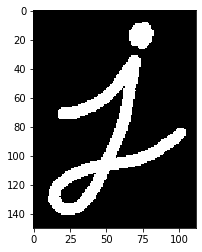

In [3]:
image = cv2.imread('images/morpho.png')
plt.imshow(image)

## 1. Erozja

Podstawowa idea erozji jest taka sama jak erozja gleby, eroduje granice obiektu na pierwszym planie Polega to na splataniu kernela z obrazem (jak w konwolucji 2D). Pixel w oryginalnym obrazie (albo 1 albo 0) będzie uważany za 1 tylko wtedy, gdy wszystkie piksele pod jądrem są 1, w przeciwnym razie jest on erodowany (zamieniany na zero).

Zatem, wszystkie piksele w pobliżu granicy zostaną odrzucone (w zależności od wielkości jądra). Tak więc grubość lub rozmiar obiektu (lub ogólnie - biały obszaR) na pierwszym planie zmniejszy się. Jest to przydatne do usuwania małych białych szumów.

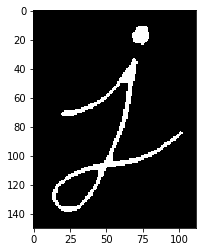

In [4]:
img = cv2.imread('images/morpho.png', 0)
kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(img, kernel, iterations = 1)
plt.imshow(erosion, cmap='gray')

## 2. Dylatacja

To przeciwieństwo erozji. Tutaj zwracana jest '1', jeśli co najmniej jeden piksel pod kernelem to '1'. W ten sposób zwiększa się obszar bieli na obrazie lub zwiększa się rozmiar obiektu na pierwszym planie. Zazwyczaj, w takich przypadkach jak usuwanie szumu, po erozji następuje rozszerzenie - Ponieważ erozja usuwa białe szumy, ale także zmniejsza nasz obiekt.

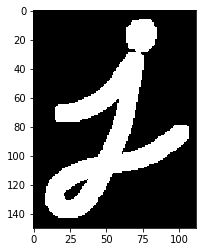

In [5]:
img = cv2.imread('images/morpho.png', 0)
kernel = np.ones((5, 5), np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 1)
plt.imshow(dilation, cmap='gray')


## Erozja i dylatacja na jednym obrazie

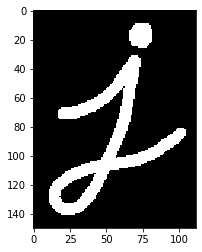

In [6]:
img = cv2.imread('images/morpho.png', 0)
kernel = np.ones((5, 5), np.uint8)
image = cv2.erode(img, kernel, iterations = 1)
image = cv2.dilate(image, kernel, iterations = 1)
plt.imshow(image, cmap='gray')

## 3. Otwarcie
To złączenie operacji erozji i dylatacji kolejno po sobie. Jest to przydatne w usuwaniu szumu (jak powyżej). Tutaj używamy funkcji, cv.morphologyEx()

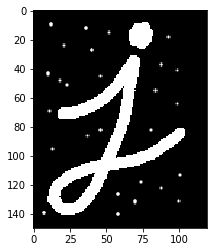

In [7]:
img = cv2.imread('images/morpho2.png', 0)
plt.imshow(img, cmap='gray')

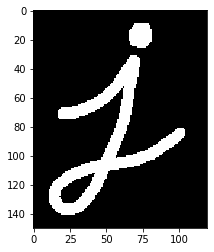

In [8]:
kernel = np.ones((5, 5), np.uint8)
result = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
plt.imshow(result, cmap='gray')

## 4. Domknięcie
To złączenie operacji dylatacji i erozji kolejno po sobie. Jest to przydatne przy usuwaniu małych otworów wewnątrz obiektów na pierwszym planie lub małych czarnych punktów na obiekcie.

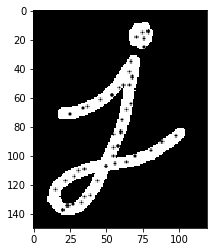

In [9]:
img = cv2.imread('images/morpho3.png', 0)
plt.imshow(img, cmap='gray')

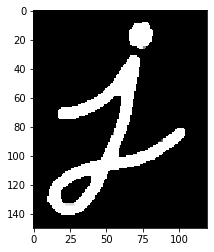

In [10]:
result = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
plt.imshow(result, cmap='gray')